<a href="https://colab.research.google.com/github/kadam-manisha/KaatruIIT/blob/main/kaatruIITMadras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
!pip install --upgrade gspread

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()


gc = gspread.authorize(creds)

worksheet = gc.open('day').sheet1

#get_all_values gives a list of rows
rows = worksheet.get_all_values()
#print(rows)


# Convert to dataframe and render
import pandas as pd
df=pd.DataFrame.from_records(rows[1:], columns=rows[0])
print(df)

    instant      dteday season yr mnth holiday weekday workingday weathersit  \
0         1  01-01-2018      1  0    1       0       1          1          2   
1         2  02-01-2018      1  0    1       0       2          1          2   
2         3  03-01-2018      1  0    1       0       3          1          1   
3         4  04-01-2018      1  0    1       0       4          1          1   
4         5  05-01-2018      1  0    1       0       5          1          1   
..      ...         ...    ... ..  ...     ...     ...        ...        ...   
725     726  27-12-2019      1  1   12       0       5          1          2   
726     727  28-12-2019      1  1   12       0       6          0          2   
727     728  29-12-2019      1  1   12       0       0          0          2   
728     729  30-12-2019      1  1   12       0       1          1          1   
729     730  31-12-2019      1  1   12       0       2          1          2   

          temp     atemp      hum  wind

In [105]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.2,10.6061,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.4635,43.6957,12.5223,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.3321,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.7523,59,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.585,48.3333,23.500518,364,1432,1796


In [106]:
df.shape

(730, 16)

In [107]:
#df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     730 non-null    object
 1   dteday      730 non-null    object
 2   season      730 non-null    object
 3   yr          730 non-null    object
 4   mnth        730 non-null    object
 5   holiday     730 non-null    object
 6   weekday     730 non-null    object
 7   workingday  730 non-null    object
 8   weathersit  730 non-null    object
 9   temp        730 non-null    object
 10  atemp       730 non-null    object
 11  hum         730 non-null    object
 12  windspeed   730 non-null    object
 13  casual      730 non-null    object
 14  registered  730 non-null    object
 15  cnt         730 non-null    object
dtypes: object(16)
memory usage: 91.4+ KB


In [108]:
#checking numerical columns statistics
df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730
unique,730,730,4,2,12,2,7,2,3,498,689,594,649,605,678,695
top,1,01-01-2018,3,0,1,0,1,1,1,26.035,32.7344,61.3333,9.041918,120,4841,5409
freq,1,1,188,365,62,709,105,504,463,5,4,4,3,4,3,2


**Insights:**
- **730 rows and 16 columns.**
- **from data dictionary we understood that:**
    - instant is just a record index, this column can be removed.
    - dteday is date column and we already have month and year columns in dataframe. thus we can drop dteday columnas it not bringing any new information.
    - addition of casual and registered columns gives cnt column, and we will not going to get much information from these columns, thus we wil drop these two as well.
- **there seems to be no missing values from non-null value count.**
- **TARGET variable/column is 'cnt'**

In [109]:
#checking all columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [110]:
#renaming columns for better visibility
df.rename(columns={'season':'Season','yr':'Year','mnth':'month','weathersit':'Weather','hum':'Humidity','cnt':'Count'},inplace=True)

In [111]:
df.head()

,instant,dteday,Season,Year,month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.2,10.6061,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.4635,43.6957,12.5223,82,1518,1600


In [112]:
#df.drop('Count',inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     730 non-null    object
 1   dteday      730 non-null    object
 2   Season      730 non-null    object
 3   Year        730 non-null    object
 4   month       730 non-null    object
 5   holiday     730 non-null    object
 6   weekday     730 non-null    object
 7   workingday  730 non-null    object
 8   Weather     730 non-null    object
 9   temp        730 non-null    object
 10  atemp       730 non-null    object
 11  Humidity    730 non-null    object
 12  windspeed   730 non-null    object
 13  casual      730 non-null    object
 14  registered  730 non-null    object
 15  Count       730 non-null    object
dtypes: object(16)
memory usage: 91.4+ KB


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     730 non-null    object
 1   dteday      730 non-null    object
 2   Season      730 non-null    object
 3   Year        730 non-null    object
 4   month       730 non-null    object
 5   holiday     730 non-null    object
 6   weekday     730 non-null    object
 7   workingday  730 non-null    object
 8   Weather     730 non-null    object
 9   temp        730 non-null    object
 10  atemp       730 non-null    object
 11  Humidity    730 non-null    object
 12  windspeed   730 non-null    object
 13  casual      730 non-null    object
 14  registered  730 non-null    object
 15  Count       730 non-null    object
dtypes: object(16)
memory usage: 91.4+ KB


In [114]:
df[['instant','Season','Year','month','holiday','weekday','workingday','Weather','casual','registered','Count']] = df[['instant','Season','Year','month','holiday','weekday','workingday','Weather','casual','registered','Count']]\
.apply(lambda x : x.astype('int64'))

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     730 non-null    int64 
 1   dteday      730 non-null    object
 2   Season      730 non-null    int64 
 3   Year        730 non-null    int64 
 4   month       730 non-null    int64 
 5   holiday     730 non-null    int64 
 6   weekday     730 non-null    int64 
 7   workingday  730 non-null    int64 
 8   Weather     730 non-null    int64 
 9   temp        730 non-null    object
 10  atemp       730 non-null    object
 11  Humidity    730 non-null    object
 12  windspeed   730 non-null    object
 13  casual      730 non-null    int64 
 14  registered  730 non-null    int64 
 15  Count       730 non-null    int64 
dtypes: int64(11), object(5)
memory usage: 91.4+ KB


In [116]:
df[['temp','atemp','Humidity','windspeed']] = df[['temp','atemp','Humidity','windspeed']]\
.apply(lambda x : x.astype('float64'))

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   Season      730 non-null    int64  
 3   Year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   Weather     730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  Humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  Count       730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


-----
# Exploratory Data Anlysis

## Data Visualisation

### 1.1.1. Categorical Variables

In [118]:
# import libraries for visualization purpose

import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# creating new df by removing unnecessary/extra columns and assigning new dataframe df_1 with remaining columns

nec_cols = ['Season','Year','month','holiday','weekday','workingday','Weather','temp','atemp','Humidity','windspeed','Count']

df_1 = df[nec_cols]
df_1.head()

,Season,Year,month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


**As observerd, all the columns are of numerical type, but from the data dictionary we see that there are some columns which represents categorical data as well.**
- **Binary Types : Year, holiday, workingday**
- **Categorical Types: Season, Month, weekday, Weather**
- **Numeric types: temp, atemp, Humidity, windspeed, Count**

In [120]:

df['Season'].nunique()

4

In [121]:
df['Season'].unique()




array([1, 2, 3, 4])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


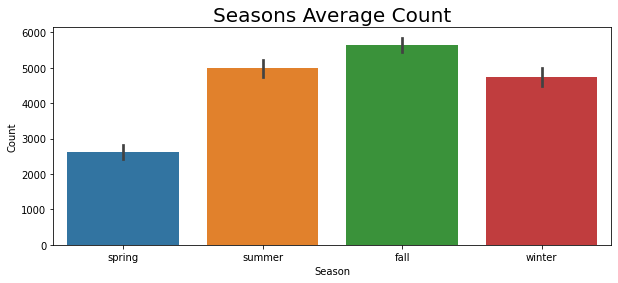

In [122]:
# mapping proper names for better visibility
# season(1:spring, 2:summer, 3:fall, a:winter)

df_1['Season'] = df_1['Season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


#Visualising Seasons count of rented bikes
plt.figure(figsize=[10,4])
sns.barplot(df_1['Season'],df_1['Count'])
plt.title('Seasons Average Count', fontsize = 20)
plt.show()

**Insights:**
- **In fall, there seems to be highest demand of rented the bikes, followed by Summer and Winter**
- **Spring seems to be the least season where people rent bikes**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


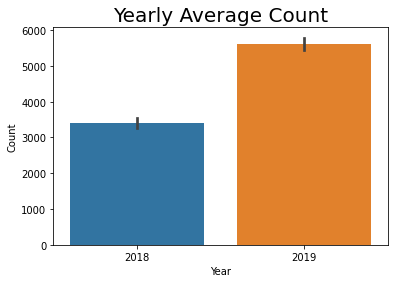

In [123]:
# mapping Year variable proper names for better visibility

df_1['Year'] = df_1['Year'].map({0:'2018', 1:'2019'})

#visualizing Yearly count of rented bikes

sns.barplot(df_1['Year'],df_1['Count'])
plt.title('Yearly Average Count', fontsize = 20)
plt.show()

**Insights:**
- **We can observe a trend here, average rented bikes has increased in 2019 almost double that of 2018**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


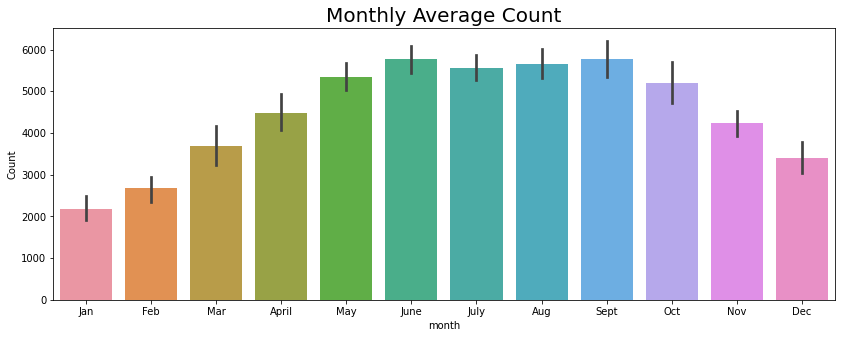

In [124]:
# mapping Month variable proper names for better visibility

df_1['month'] = df_1['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                       5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

#visualizing Monthly count of rented bikes

plt.figure(figsize=[14,5])
min([], default=0)

sns.barplot(df_1['month'],df_1['Count'])
plt.title('Monthly Average Count', fontsize = 20)
plt.show()



**Insights:**
- **More and almost similar average count of rented bikes in August, June, September, July followed by May, October. Company should make sure they prepare with high availability during these months**
- **December, January, February have the least demand probably due to winter season**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


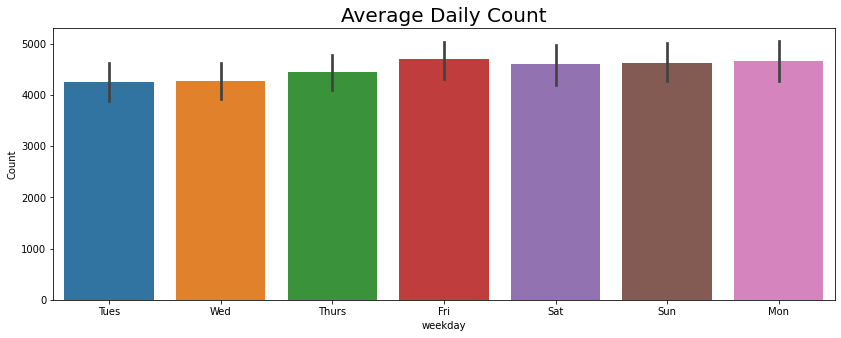

In [125]:
#mapping weekday variable proper names for better visibility
df_1['weekday'] = df_1['weekday'].map({0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs',4:'Fri',5:'Sat', 6:'Sun'})

# Visualising Daily count of rented bikes

plt.figure(figsize=[14,5])
min([],default=0)

sns.barplot(df_1['weekday'],df_1['Count'])
plt.title('Average Daily Count', fontsize = 20)
plt.show()





**Insights:**
- **looks like all days have similar demands, but still Sunday, Monday, Saturday, Friday has high demands than other days**
- **People less prefer rented bike on Thrusday, Wednesday,Tuesday**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


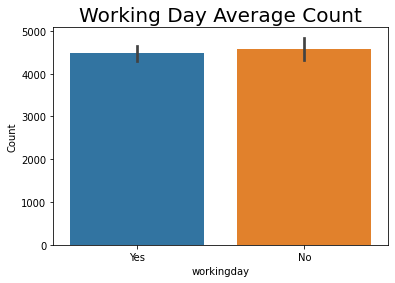

In [126]:
# mapping workingday variable proper names for better visibility

df_1['workingday'] = df_1['workingday'].map({0:'No',1:'Yes'})

#Visualising Workingday count of rented bikes

sns.barplot(df_1['workingday'],df_1['Count'])

plt.title('Working Day Average Count', fontsize = 20)
plt.show()

**Insights:**
- **There are similar demands whether it's a working day or not.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


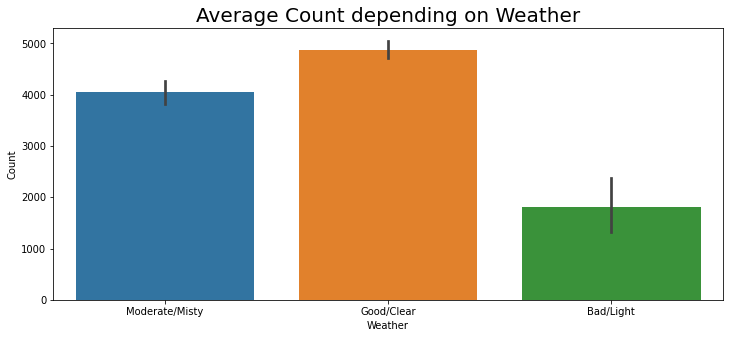

In [127]:
#mapping weather variable proper names for better visibility

#weathersit :
#1:Clear, Few clouds, Partly cloudy = Good /Clear
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = Moderate/Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds = Bad/Light Rain
#4:Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = Worse/Heavy Rain

df_1['Weather'] = df_1['Weather'].map({1:"Good/Clear", 2:"Moderate/Misty",3:"Bad/Light", 4:"Worse/HeavyRain"})

# Visualising Daily Count of rented bikes

plt.figure(figsize=[12,5])
sns.barplot(df_1['Weather'],df_1['Count'])
plt.title('Average Count depending on Weather', fontsize = 20)
plt.show()

**Insights:**
- **It clearly shows that if the weather is clear, the demand is more**
- **If the weather is bad, demand decreases drastically**
- **Company should leverage and look up for forecast of weather to fullfill demands**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


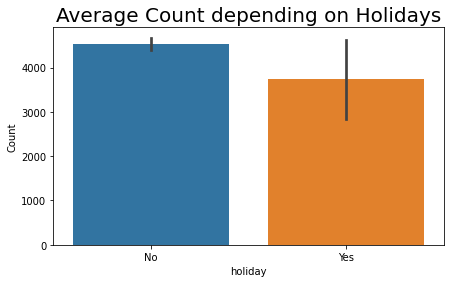

In [128]:
# mapping Holiday variable proper names for better visibility

df_1['holiday'] = df_1['holiday'].map({0:'No', 1:'Yes'})

#Visualising Holiday wise count of rented bikes

plt.figure(figsize=[7,4])
sns.barplot(df_1['holiday'],df_1['Count'])
plt.title('Average Count depending on Holidays', fontsize = 20)
plt.show()

**Insights:**
- **There is high decrease of demand if it is a holiday**

----
### 1.1.2. Numerical Variables

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


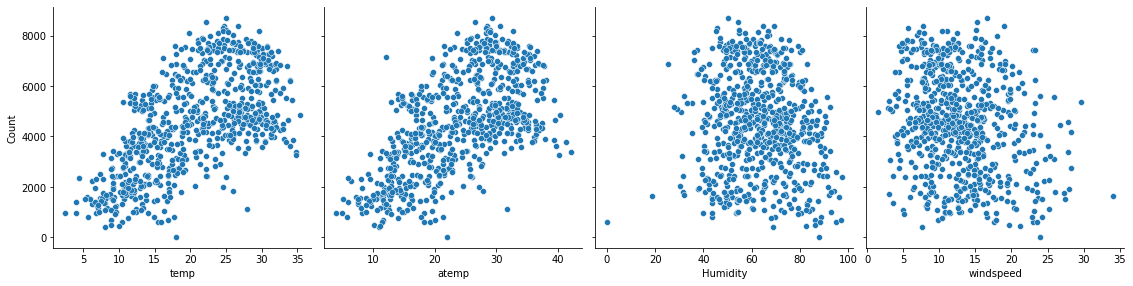

In [129]:
sns.pairplot(df_1, x_vars=['temp','atemp','Humidity','windspeed'], y_vars='Count',size=4, aspect=1, kind='scatter', diag_kind=None)
plt.show()

**Insight:**
- **as can be seen from above plots, there is some linear relation between temp, atemp with Count.**
- **this shows that we can do linear regression for solving the problem.**

-----
**Independent variables which could be a good predictor from EDA are:**
- **temp**
- **Weather**
- **Months**
- **Seasons**
- **workingday**

---
# Data Preparation


In [130]:
#creating a list and putting all category columns in to it and converting them to category data type

cat = ['Season','Year','month','holiday','weekday','workingday','Weather']

for i in cat:
  df_1[i] = df_1[i].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [131]:
#checking converted datatypes

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Season      730 non-null    category
 1   Year        730 non-null    category
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   Weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   Humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  Count       730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [132]:
# for linear model creating dummies

dummy = pd.get_dummies(df_1[cat], drop_first=True)
dummy.head()

,Season_spring,Season_summer,Season_winter,Year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0


In [133]:
#Combining both the dataframe, df_1 and dummy variables

df_new = pd.concat([df_1,dummy], axis=1)
df_new.head()

,Season,Year,month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
0,spring,2018,Jan,No,Tues,Yes,Moderate/Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,1,0,1
1,spring,2018,Jan,No,Wed,Yes,Moderate/Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,1,0,1
2,spring,2018,Jan,No,Thurs,Yes,Good/Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,1,0
3,spring,2018,Jan,No,Fri,Yes,Good/Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,1,0
4,spring,2018,Jan,No,Sat,Yes,Good/Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,1,1,0


In [134]:
#dropping columns from which dummy variables were created

df_new.drop(cat, axis=1, inplace = True)

In [135]:
df_new.head()

,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,month_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [136]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp                    730 non-null    float64
 1   atemp                   730 non-null    float64
 2   Humidity                730 non-null    float64
 3   windspeed               730 non-null    float64
 4   Count                   730 non-null    int64  
 5   Season_spring           730 non-null    uint8  
 6   Season_summer           730 non-null    uint8  
 7   Season_winter           730 non-null    uint8  
 8   Year_2019               730 non-null    uint8  
 9   month_Aug               730 non-null    uint8  
 10  month_Dec               730 non-null    uint8  
 11  month_Feb               730 non-null    uint8  
 12  month_Jan               730 non-null    uint8  
 13  month_July              730 non-null    uint8  
 14  month_June              730 non-null    ui

- Now there are total of 30 columns, we will start model building now

## Train - Test Split

In [137]:
# importing statsmodel and sklearn libraries for linear regression model building

import sklearn
import statsmodels.api as sample_data
from sklearn.model_selection import train_test_split

In [138]:
#splitting the date into two train and test dataframes

df_train_df_new, df_test_df_new = train_test_split(df_new, train_size=0.70, random_state=100)

In [139]:
# verify the columns and rows

print(df_train_df_new.shape)
print(df_test_df_new.shape)

(510, 30)
(220, 30)


## Rescaling the features

- using MinMax Scaler

In [140]:
# importing MinMax scaler from preprocessing module of sklearn library

from sklearn.preprocessing import MinMaxScaler

In [141]:
#defining a variable scaler for minmax scaling

scaler = MinMaxScaler()

In [142]:
df_new.columns

Index(['temp', 'atemp', 'Humidity', 'windspeed', 'Count', 'Season_spring',
       'Season_summer', 'Season_winter', 'Year_2019', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_July', 'month_June', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sept', 'holiday_Yes',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Wed', 'workingday_Yes', 'Weather_Good/Clear',
       'Weather_Moderate/Misty'],
      dtype='object')

In [143]:
#performing scaling on all numericals variables of train dataset and leaving Count variable aside

num_vars = ['temp','atemp','Humidity','windspeed','Count']

df_train_df_new[num_vars] = scaler.fit_transform(df_train_df_new[num_vars])
df_train_df_new[num_vars].head()

,temp,atemp,Humidity,windspeed,Count
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095


In [144]:
# checking all columns and all the variables after scaling
df_train_df_new.describe()

,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,month_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,0.096078,...,0.025490,0.137255,0.147059,0.129412,0.135294,0.154902,0.152941,0.711765,0.625490,0.345098
std,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,0.294988,...,0.157763,0.344454,0.354512,0.335985,0.342373,0.362166,0.360284,0.453386,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


----
**Before start the training process we will plot a heat map to check multicollinearity**

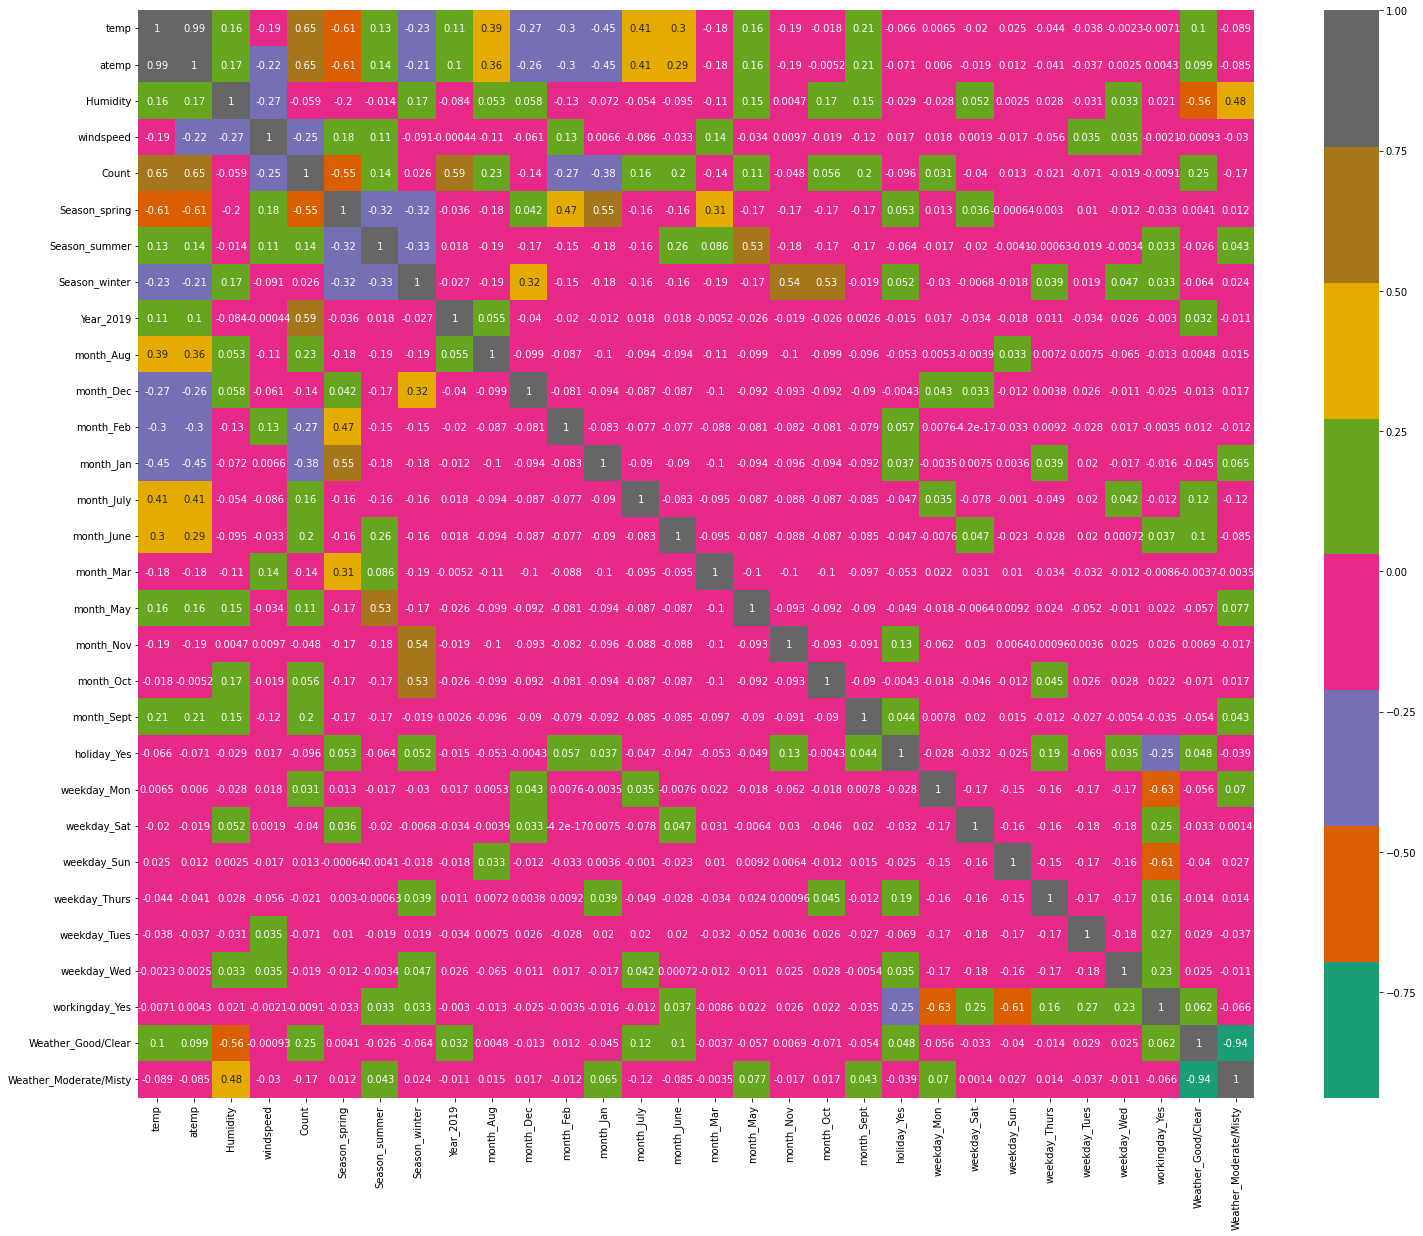

In [145]:
# Let's check the corelation coefficients to see which variables are highly correlated

plt.figure(figsize=[25,20])
sns.heatmap(df_train_df_new.corr(),annot = True, cmap = 'Dark2')
plt.show()

**INSIGHT:** - 
- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable. 
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# Model Building

In [146]:
#Dividing training set ito X_train and y_train sets for the model building

y_train = df_train_df_new.pop('Count')
X_train = df_train_df_new

print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


In [147]:
# importing RFE library for feature selection and after this will perform manual feature selection.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [148]:

# using RFE for feature selection and  limiting to selecton to 15 features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [149]:
#creating a list of features selected by RFE

list(zip(X_train, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 4),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('Season_spring', True, 1),
 ('Season_summer', True, 1),
 ('Season_winter', True, 1),
 ('Year_2019', True, 1),
 ('month_Aug', False, 11),
 ('month_Dec', False, 2),
 ('month_Feb', False, 3),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 13),
 ('month_Mar', False, 16),
 ('month_May', False, 10),
 ('month_Nov', True, 1),
 ('month_Oct', False, 14),
 ('month_Sept', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', False, 15),
 ('weekday_Sun', False, 6),
 ('weekday_Thurs', False, 12),
 ('weekday_Tues', False, 9),
 ('weekday_Wed', False, 8),
 ('workingday_Yes', False, 5),
 ('Weather_Good/Clear', True, 1),
 ('Weather_Moderate/Misty', True, 1)]

In [150]:
# creating a list of features selected by RFE

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['temp', 'Humidity', 'windspeed', 'Season_spring', 'Season_summer',
       'Season_winter', 'Year_2019', 'month_Jan', 'month_July', 'month_Nov',
       'month_Sept', 'holiday_Yes', 'Weather_Good/Clear',
       'Weather_Moderate/Misty'],
      dtype='object')

In [151]:
#features which are chosen by RFE during feature selection( so un-supported columns)

X_train.columns[~rfe.support_]

Index(['atemp', 'month_Aug', 'month_Dec', 'month_Feb', 'month_June',
       'month_Mar', 'month_May', 'month_Oct', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thurs', 'weekday_Tues', 'weekday_Wed',
       'workingday_Yes'],
      dtype='object')

In [152]:
# Creating new train dataframe with RFE selected features
X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,temp,Humidity,windspeed,Season_spring,Season_summer,Season_winter,Year_2019,month_Jan,month_July,month_Nov,month_Sept,holiday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
576,0.815169,0.725633,0.264686,0,0,0,1,0,1,0,0,0,1,0
426,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,1,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,1
111,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,1


### Model 1

In [153]:
# importing statsmodels to add constant/intercept.

import statsmodels.api as sm

#Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

#Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          4.41e-189
Time:                        17:52:24   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0629      0.047      1.326      0.185      -0.030       0.156
temp                       0.5055      0.035     14.369      0.000       0.436       0.575
Humidity                  -0.1697      0.038     -4.497      0.000      -0.244      -0.096
windspeed                 -0.1858      0.026     -7.190      0.000      -0.237      -0.135
Season_spring             -0.0562      0.021     -2.652      0.008      -0.098      -0.015
Season_summer              0.0479      0.015      3.168      0.002       0.018       0.078
Season_winter              0.0972      0.018      5.421      0.000       0.062       0.132
Year_2019                  0.2302      0.008     28.371      0.000       0.214       0.246
month_Jan                 -0.0341      0.018     -1.936      0.053      -0.069       0.001
month_July                -0.0559      0.018     -3.057      0.002      -0.092      -0.020
month_Nov                 -0.0236      0.017     -1.362      0.174      -0.058       0.010
month_Sept                 0.0802      0.017      4.775      0.000       0.047       0.113
holiday_Yes               -0.0920      0.026     -3.582      0.000      -0.142      -0.042
Weather_Good/Clear         0.2404      0.026      9.131      0.000       0.189       0.292
Weather_Moderate/Misty     0.1876      0.025      7.511      0.000       0.139       0.237
==============================================================================
Omnibus:                       60.634   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.746
Skew:                          -0.640   Prob(JB):                     7.44e-31
Kurtosis:                       5.211   Cond. No.                         25.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
#importing libraries to check the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import  variance_inflation_factor

#Create  a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Humidity,25.28
0,temp,22.80
12,Weather_Good/Clear,14.70
13,Weather_Moderate/Misty,8.98
3,Season_spring,5.71
2,windspeed,4.67
5,Season_winter,4.39
4,Season_summer,3.22
6,Year_2019,2.10
7,month_Jan,1.70


-----
### Model 2


- removing feature - Humidity due very high VIF values as all the p-values < 0.05.

In [155]:
X_train_rfe2 = X_train_rfe.drop('Humidity', axis = 1)

#add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

#Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          5.93e-186
Time:                        17:52:24   Log-Likelihood:                 501.87
No. Observations:                 510   AIC:                            -975.7
Df Residuals:                     496   BIC:                            -916.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0660      0.038     -1.717      0.087      -0.142       0.010
temp                       0.4656      0.035     13.420      0.000       0.397       0.534
windspeed                 -0.1532      0.025     -6.061      0.000      -0.203      -0.104
Season_spring             -0.0656      0.021     -3.055      0.002      -0.108      -0.023
Season_summer              0.0413      0.015      2.690      0.007       0.011       0.071
Season_winter              0.0802      0.018      4.493      0.000       0.045       0.115
Year_2019                  0.2344      0.008     28.540      0.000       0.218       0.251
month_Jan                 -0.0390      0.018     -2.178      0.030      -0.074      -0.004
month_July                -0.0506      0.019     -2.718      0.007      -0.087      -0.014
month_Nov                 -0.0212      0.018     -1.199      0.231      -0.056       0.014
month_Sept                 0.0741      0.017      4.343      0.000       0.041       0.108
holiday_Yes               -0.0929      0.026     -3.550      0.000      -0.144      -0.041
Weather_Good/Clear         0.2869      0.025     11.625      0.000       0.238       0.335
Weather_Moderate/Misty     0.2072      0.025      8.266      0.000       0.158       0.256
==============================================================================
Omnibus:                       62.126   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.195
Skew:                          -0.653   Prob(JB):                     8.05e-32
Kurtosis:                       5.244   Cond. No.                         20.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
# Check the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import  variance_inflation_factor

#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
11,Weather_Good/Clear,14.68
0,temp,13.25
12,Weather_Moderate/Misty,8.31
1,windspeed,4.65
2,Season_spring,4.40
4,Season_winter,2.99
3,Season_summer,2.76
5,Year_2019,2.08
6,month_Jan,1.66
8,month_Nov,1.62


-----
### Model 3
- removing feature - 'Weather_Moderate/Misty' due very high VIF values as all the p-values < 0.05. even temp and Weather_Good/Clear has value way higher VIF but from data dictionary and EDA we get that they play a major role in the demand of bikes. thus we are retaining them as of now.

In [157]:
X_train_rfe3 = X_train_rfe2.drop('Weather_Moderate/Misty', axis = 1)

# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe3)

#Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     182.3
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          2.94e-173
Time:                        17:52:25   Log-Likelihood:                 468.96
No. Observations:                 510   AIC:                            -911.9
Df Residuals:                     497   BIC:                            -856.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1268      0.033      3.891      0.000       0.063       0.191
temp                   0.4718      0.037     12.764      0.000       0.399       0.544
windspeed             -0.1755      0.027     -6.554      0.000      -0.228      -0.123
Season_spring         -0.0621      0.023     -2.713      0.007      -0.107      -0.017
Season_summer          0.0452      0.016      2.763      0.006       0.013       0.077
Season_winter          0.0728      0.019      3.829      0.000       0.035       0.110
Year_2019              0.2379      0.009     27.219      0.000       0.221       0.255
month_Jan             -0.0330      0.019     -1.730      0.084      -0.070       0.004
month_July            -0.0557      0.020     -2.812      0.005      -0.095      -0.017
month_Nov             -0.0161      0.019     -0.857      0.392      -0.053       0.021
month_Sept             0.0707      0.018      3.892      0.000       0.035       0.106
holiday_Yes           -0.0883      0.028     -3.167      0.002      -0.143      -0.034
Weather_Good/Clear     0.0955      0.009     10.498      0.000       0.078       0.113
==============================================================================
Omnibus:                       95.068   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.437
Skew:                          -0.871   Prob(JB):                     8.56e-64
Kurtosis:                       6.261   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-----
### Model 4
- removing feature - 'Month_Nov' coz high p-values(0.148).

In [158]:
X_train_rfe4 = X_train_rfe3.drop('month_Nov', axis = 1)

# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     198.9
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          2.93e-174
Time:                        17:52:25   Log-Likelihood:                 468.59
No. Observations:                 510   AIC:                            -913.2
Df Residuals:                     498   BIC:                            -862.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1230      0.032      3.811      0.000       0.060       0.186
temp                   0.4767      0.036     13.062      0.000       0.405       0.548
windspeed             -0.1767      0.027     -6.610      0.000      -0.229      -0.124
Season_spring         -0.0591      0.023     -2.614      0.009      -0.104      -0.015
Season_summer          0.0468      0.016      2.880      0.004       0.015       0.079
Season_winter          0.0693      0.019      3.733      0.000       0.033       0.106
Year_2019              0.2378      0.009     27.218      0.000       0.221       0.255
month_Jan             -0.0324      0.019     -1.704      0.089      -0.070       0.005
month_July            -0.0555      0.020     -2.804      0.005      -0.094      -0.017
month_Sept             0.0725      0.018      4.018      0.000       0.037       0.108
holiday_Yes           -0.0913      0.028     -3.298      0.001      -0.146      -0.037
Weather_Good/Clear     0.0951      0.009     10.472      0.000       0.077       0.113
==============================================================================
Omnibus:                       92.324   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.195
Skew:                          -0.854   Prob(JB):                     1.75e-60
Kurtosis:                       6.168   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.78
1,windspeed,4.57
2,Season_spring,2.84
10,Weather_Good/Clear,2.71
3,Season_summer,2.21
5,Year_2019,2.07
4,Season_winter,1.74
6,month_Jan,1.60
7,month_July,1.59
8,month_Sept,1.33


-----
### Model 5

- removing feature - 'Month_Jan' coz of high p-values(0.089).

In [160]:
X_train_rfe5 = X_train_rfe4.drop('month_Jan', axis = 1)

# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe5)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

lr5.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     217.6
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          8.19e-175
Time:                        17:52:25   Log-Likelihood:                 467.10
No. Observations:                 510   AIC:                            -912.2
Df Residuals:                     499   BIC:                            -865.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1088      0.031      3.483      0.001       0.047       0.170
temp                   0.4927      0.035     13.944      0.000       0.423       0.562
windspeed             -0.1706      0.027     -6.427      0.000      -0.223      -0.118
Season_spring         -0.0638      0.022     -2.836      0.005      -0.108      -0.020
Season_summer          0.0494      0.016      3.048      0.002       0.018       0.081
Season_winter          0.0745      0.018      4.063      0.000       0.038       0.111
Year_2019              0.2372      0.009     27.118      0.000       0.220       0.254
month_July            -0.0569      0.020     -2.872      0.004      -0.096      -0.018
month_Sept             0.0729      0.018      4.033      0.000       0.037       0.108
holiday_Yes           -0.0919      0.028     -3.315      0.001      -0.146      -0.037
Weather_Good/Clear     0.0957      0.009     10.529      0.000       0.078       0.114
==============================================================================
Omnibus:                       91.943   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.468
Skew:                          -0.850   Prob(JB):                     2.51e-60
Kurtosis:                       6.166   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.75
1,windspeed,4.55
9,Weather_Good/Clear,2.71
3,Season_summer,2.19
2,Season_spring,2.12
5,Year_2019,2.06
4,Season_winter,1.74
6,month_July,1.59
7,month_Sept,1.32
8,holiday_Yes,1.04



-----
### Model 6
- removing feature - 'Month_July' coz of high collinearity with temp variable.
- even hum and temp VIF values are high but from data dictionary we get that it plays a major role of humidity and temperature, thus we will retain them.



In [162]:
X_train_rfe6 = X_train_rfe5.drop('month_July', axis = 1)

# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe6)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     237.5
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          3.04e-174
Time:                        17:52:25   Log-Likelihood:                 462.92
No. Observations:                 510   AIC:                            -905.8
Df Residuals:                     500   BIC:                            -863.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1009      0.031      3.218      0.001       0.039       0.162
temp                   0.4782      0.035     13.576      0.000       0.409       0.547
windspeed             -0.1711      0.027     -6.398      0.000      -0.224      -0.119
Season_spring         -0.0509      0.022     -2.292      0.022      -0.094      -0.007
Season_summer          0.0665      0.015      4.382      0.000       0.037       0.096
Season_winter          0.0884      0.018      4.958      0.000       0.053       0.123
Year_2019              0.2378      0.009     27.008      0.000       0.221       0.255
month_Sept             0.0884      0.017      5.083      0.000       0.054       0.123
holiday_Yes           -0.0906      0.028     -3.245      0.001      -0.145      -0.036
Weather_Good/Clear     0.0944      0.009     10.318      0.000       0.076       0.112
==============================================================================
Omnibus:                       94.652   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.230
Skew:                          -0.883   Prob(JB):                     1.04e-60
Kurtosis:                       6.144   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.66
1,windspeed,4.54
8,Weather_Good/Clear,2.70
5,Year_2019,2.06
2,Season_spring,2.02
3,Season_summer,1.85
4,Season_winter,1.57
6,month_Sept,1.22
7,holiday_Yes,1.04


-----
### Model 7
- removing feature - 'Season_spring' coz of high negative collinearity with temp variable.

In [164]:
X_train_rfe7 = X_train_rfe6.drop('Season_spring', axis = 1)

# Add a constant
X_train_lm7 = sm.add_constant(X_train_rfe7)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

lr7.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     264.2
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          2.45e-174
Time:                        17:52:25   Log-Likelihood:                 460.26
No. Observations:                 510   AIC:                            -902.5
Df Residuals:                     501   BIC:                            -864.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0417      0.018      2.337      0.020       0.007       0.077
temp                   0.5428      0.021     25.540      0.000       0.501       0.585
windspeed             -0.1756      0.027     -6.559      0.000      -0.228      -0.123
Season_summer          0.0903      0.011      8.152      0.000       0.069       0.112
Season_winter          0.1205      0.011     10.863      0.000       0.099       0.142
Year_2019              0.2366      0.009     26.806      0.000       0.219       0.254
month_Sept             0.0978      0.017      5.761      0.000       0.064       0.131
holiday_Yes           -0.0928      0.028     -3.312      0.001      -0.148      -0.038
Weather_Good/Clear     0.0939      0.009     10.226      0.000       0.076       0.112
==============================================================================
Omnibus:                       88.063   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.486
Skew:                          -0.853   Prob(JB):                     1.21e-51
Kurtosis:                       5.851   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.35
1,windspeed,3.08
7,Weather_Good/Clear,2.55
4,Year_2019,2.00
2,Season_summer,1.55
3,Season_winter,1.33
5,month_Sept,1.20
6,holiday_Yes,1.04


---
**This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).**

### Final Model Interpretation
- **Hypothesis Testing:**
    - Hypothesis testing states that:
        - H0:B1=B2=...=Bn=0 
        - H1:  at least one  Bi!=0 
        

**Model 8  coefficient values**

- const	       	=		0.0417	
- temp	      	=		0.5428	
- windspeed	  	=		-0.1756	
- Season_summer	=		0.0903	
- Season_winter	=		0.1205	
- Year_2019		=		0.2366	
- Month_Sept		=		0.0978	
- holiday_Yes		=		-0.0928	
- Weather_Good/Clear	=	0.0939	

**INSIGHT:  From the Model 8 model summary, it is evident that all our coefficients are not equal to zero. which means We REJECT the NULL HYPOTHESIS**

**F Statistics** : F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 264.2
- Prob (F-statistic): 2.45e-174

**The F-Statistics value of 264.2 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant**

### The equation for best fitted line based on Model 8:


$Count = 0.0417 + (temp * 0.5428) - (windspeed * 0.1756) + (Season summer * 0.0903) + (Season winter * 0.1205) + (Year 2019 * 0.2366) + (Month Sept * 0.0978) - (holiday Yes * 0.0928) + (Weather Good/Clear * 0.0939)$



### Interpretation of Coefficients:

- **const**: The Constant value of ‘0.0417’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike demand still increases by 0.0417 units.

- **𝑡𝑒𝑚𝑝**: A coefficient value of ‘0.5428’ indicate a unit increase in temp variable, increases the bike demand by 0.5428 units.

- **𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑**: A coefficient value of ‘-0.1756’ indicate a unit decrease in windspeed variable, decreases bike demand by 0.1756 units.

- **𝑆𝑒𝑎𝑠𝑜𝑛_𝑠𝑢𝑚𝑚𝑒𝑟**: A coefficient value of ‘0.0903’ indicate a unit increase in Season_summer variable, increases bike demand by 0.0903 units.

- **𝑆𝑒𝑎𝑠𝑜𝑛_𝑤𝑖𝑛𝑡𝑒𝑟**: A coefficient value of ‘0.1205’ indicate a unit increase in Season_winter variable, increases bike demand by 0.1205 units.

- **𝑌𝑒𝑎𝑟_2019**: A coefficient value of ‘0.2366’ indicate a unit increase in Year_2019 variable, increases the bike demand by 0.2366 units.

- **𝑀𝑜𝑛𝑡ℎ_𝑆𝑒𝑝𝑡**: A coefficient value of ‘0.0978’ indicate a unit increase in Month_Sept variable, increases the bike demand by 0.0978 units.

- **ℎ𝑜𝑙𝑖𝑑𝑎𝑦_𝑌𝑒𝑠**: A coefficient value of ‘-0.0928’ indicate a unit decrease in holiday_Yes variable, decreases bike demand by 0.0928 units.

- **𝑊𝑒𝑎𝑡ℎ𝑒𝑟_𝐺𝑜𝑜𝑑/𝐶𝑙𝑒𝑎𝑟**: A coefficient value of ‘0.0939’ indicate a unit increase if the weather is good, increases the bike demand by 0.0939 units.

## VALIDATE ASSUMPTIONS
### Error terms are normally distributed with mean zero (not X, Y)
### Residual Analysis Of Training Data

In [166]:
y_train_pred = lr7.predict(X_train_lm7)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


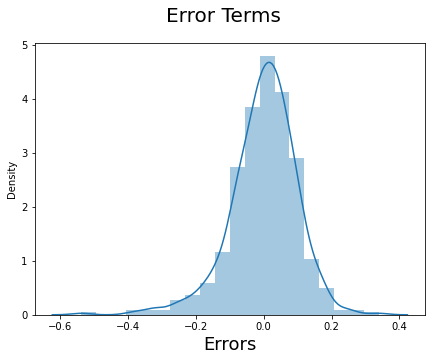

In [167]:
# residual calculations
res = y_train - y_train_pred

# Plot the histogram of the error terms

fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)        # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

**INSIGHT:** - From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### Check for Homoscedasticity

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


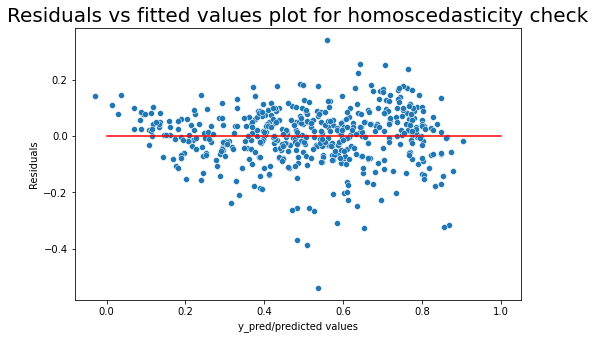

In [168]:
# Check for Homoscedasticity
plt.figure(figsize = [8,5])
p = sns.scatterplot(y_train_pred,res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check', fontsize = 20)

**INSIGHT:** - From the above plot, we can see that residuals have equal or almost equal variance across the regression line.

### MAKING PREDICTION USING FINAL MODEL
Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (Model 8)

**Applying the scaling on the test sets**
- We will only use **scaler.transform**, as we want to use the metrics that model learned from the training data to be applied on the test data.

In [169]:
# Apply scaler() to all numeric variables in test dataset. 

df_test_df_new[num_vars] = scaler.transform(df_test_df_new[num_vars])
df_test_df_new.head()

,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,month_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
535,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
221,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
152,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [170]:
# variables after scaling the test data
df_test_df_new.describe()

,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,month_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.481818,0.059091,...,0.036364,0.154545,0.131818,0.172727,0.159091,0.118182,0.122727,0.640909,0.654545,0.318182
std,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.500809,0.236333,...,0.187620,0.362295,0.339064,0.378873,0.366595,0.323559,0.328872,0.480828,0.476601,0.466833
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [171]:
# Dividing test set into X_test and y_test sets for the model building

y_test = df_test_df_new.pop('Count')
X_test = df_test_df_new

print(y_test.shape)
print(X_test.shape)

(220,)
(220, 29)


In [172]:
#Selecting the variables that were part of final model (Model 8).
col_test = X_train_rfe7.columns

X_test = X_test[col_test]

# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)

X_test_lm7.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,temp,windspeed,Season_summer,Season_winter,Year_2019,month_Sept,holiday_Yes,Weather_Good/Clear
184,1.0,0.831783,0.084219,0,0,0,0,1,0
535,1.0,0.901354,0.153728,1,0,1,0,0,1
299,1.0,0.511964,0.334206,0,1,0,0,0,0
221,1.0,0.881625,0.339570,0,0,0,0,0,1
152,1.0,0.817246,0.537414,1,0,0,0,0,1


In [173]:
# Making predictions using the final model (lr8)

y_test_pred = lr7.predict(X_test_lm7)

### Model Evaluation

Text(0, 0.5, 'y_test_pred')

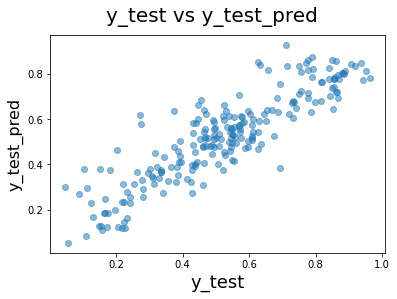

In [174]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 

**We can see there is linear relationship between y_test and y_test_pred**

---
### Residaul Analysis

In [175]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 78.32
Train data r^2 : 80.84


### Adjusted R^2 Value for TEST

$Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)$

In [176]:

# n for test data ,n1 for train data is number of rows
n = X_test.shape[0]
n1 = X_train_rfe7.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = X_test.shape[1]
p1 = X_train_rfe7.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 77.5
Train data adjusted r^2 : 80.53


## FINAL RESULT COMPARISON: 
- Test data r^2 : 78.32
- Train data r^2 : 80.84

- Test data adjusted r^2 : 77.5
- Train data adjusted r^2 : 80.53

This seems to be a really good model that can very well 'Generalize' various datasets. 

**As per our final Model, the below predictor variables influences bike booking :**
- Temperature (temp)
- September Month 
- Year -2019
- Summer Seaon
- Winter Seson
- If its a holiday
- If the weather is clear/Good
- Speed of the Wind